In [40]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Read CSV file
housing = pd.read_csv('Resources/portland_housing.csv')

C:\Users\klcol\AppData\Local\Temp\ipykernel_10068\3008077923.py:8: DtypeWarning: Columns (20,50,161,200) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('Resources/portland_housing.csv')


In [2]:
# Convert to DataFrame
housing_df = pd.DataFrame(housing)
housing_df

,abbreviatedAddress,address/city,address/zipcode,bathrooms,bedrooms,brokerageName,dateSold,daysOnZillow,description,favoriteCount,...,taxHistory/0/taxPaid,taxHistory/0/time,taxHistory/0/value,taxHistory/0/valueIncreaseRate,url,yearBuilt,zestimate,zestimateHighPercent,zestimateLowPercent,zpid
0,2860 NE Blossom Hill Rd,Fairview,97024,3.0,3.0,NaN,1.621560e+12,25.0,"2860 NE Blossom Hill Rd, Fairview, OR 97024 is...",NaN,...,2989.74,1.592260e+12,172290.0,0.029950,https://www.zillow.com/homedetails/2860-NE-Blo...,2007.0,317406.0,5.0,5.0,72258538
1,20386 NE Mackenzie Ln,Fairview,97024,3.0,3.0,Harcourts Real Estate Network Group,1.619140e+12,53.0,Cute as a button 3bed/2.5bath home with brand ...,NaN,...,NaN,NaN,NaN,NaN,https://www.zillow.com/homedetails/20386-NE-Ma...,2001.0,NaN,NaN,NaN,2073593774
2,1121 SW 10th Dr,Gresham,97080,3.0,4.0,ERA Freeman & Associates,1.622760e+12,11.0,What a wonderful large home at end of quiet cu...,NaN,...,5178.62,1.592260e+12,282340.0,0.029987,https://www.zillow.com/homedetails/1121-SW-10t...,1982.0,512355.0,5.0,5.0,53959026
3,19309 NE Glisan St,Portland,97230,1.0,3.0,"Premiere Property Group, LLC",1.622760e+12,11.0,NaN,1.0,...,2420.36,1.497560e+12,142330.0,0.029959,https://www.zillow.com/homedetails/19309-NE-Gl...,1953.0,NaN,NaN,NaN,176563865
4,25-65 NW 20th St,Gresham,97030,3.0,6.0,NaN,1.622510e+12,14.0,"25-65 NW 20th St, Gresham, OR 97030 is a apart...",NaN,...,2809.61,1.592260e+12,153180.0,0.029989,https://www.zillow.com/homedetails/25-65-NW-20...,1967.0,NaN,NaN,NaN,53819568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25726,7600 SW Erica Pl,Beaverton,97008,2.0,3.0,Keller Williams Realty Portland Elite,1.595290e+12,363.0,Perfectly nestled back from the Cul-de-sac roa...,NaN,...,4647.94,1.563570e+12,225360.0,0.000000,https://www.zillow.com/homedetails/7600-SW-Eri...,1977.0,489400.0,6.0,5.0,48549635
25727,7275 SW Palmer Way,Beaverton,97007,3.0,4.0,Keller Williams Realty Professionals,1.595200e+12,364.0,Contemporary Dream Home Backing To Lowami Hart...,1.0,...,6470.76,1.563570e+12,313740.0,0.000000,https://www.zillow.com/homedetails/7275-SW-Pal...,1974.0,725500.0,6.0,5.0,48547614
25728,(Undisclosed Address),Beaverton,97008,2.0,2.0,Opendoor Brokerage LLC,1.622760e+12,45.0,This Beaverton two-story cul-de-sac home offer...,NaN,...,4245.13,1.563570e+12,205830.0,0.000000,https://www.zillow.com/homedetails/7811-SW-Hew...,2001.0,387200.0,5.0,5.0,48581875
25729,7250 SW 70th Ave,Portland,97223,2.0,3.0,NaN,1.599000e+12,320.0,Close-in yet feels like the country. Large lot...,NaN,...,3384.07,1.563570e+12,164080.0,0.000000,https://www.zillow.com/homedetails/7250-SW-70t...,1920.0,563700.0,8.0,8.0,48585019


In [3]:
# Print all column names to a list
print(housing_df.columns.tolist())

['abbreviatedAddress', 'address/city', 'address/zipcode', 'bathrooms', 'bedrooms', 'brokerageName', 'dateSold', 'daysOnZillow', 'description', 'favoriteCount', 'homeStatus', 'homeType', 'lastSoldPrice', 'latitude', 'livingArea', 'longitude', 'lotSize', 'pageViewCount', 'postingContact/name', 'price', 'priceHistory/0/attributeSource/infoString1', 'priceHistory/0/attributeSource/infoString2', 'priceHistory/0/attributeSource/infoString3', 'priceHistory/0/buyerAgent/name', 'priceHistory/0/buyerAgent/photo/url', 'priceHistory/0/buyerAgent/profileUrl', 'priceHistory/0/date', 'priceHistory/0/event', 'priceHistory/0/postingIsRental', 'priceHistory/0/price', 'priceHistory/0/priceChangeRate', 'priceHistory/0/pricePerSquareFoot', 'priceHistory/0/sellerAgent/name', 'priceHistory/0/sellerAgent/photo/url', 'priceHistory/0/sellerAgent/profileUrl', 'priceHistory/0/showCountyLink', 'priceHistory/0/source', 'priceHistory/0/time', 'priceHistory/1/attributeSource/infoString1', 'priceHistory/1/attributeSou

In [4]:
# Create new DataFrame for cleaning data
clean_housing_df = housing_df

# Drop unnecessary columns
clean_housing_df.drop(clean_housing_df.columns[[0, 5, 7, 8, 9, 
                                                10, 12, 13, 15, 17, 
                                                18, 143, 342, 347]], axis=1, inplace=True)
clean_housing_df.drop(list(clean_housing_df.filter(regex='priceHistory')), axis=1, inplace=True)
clean_housing_df.drop(list(clean_housing_df.filter(regex='tax')), axis=1, inplace=True)
clean_housing_df.drop(list(clean_housing_df.filter(regex='schools')), axis=1, inplace=True)
clean_housing_df.drop(list(clean_housing_df.filter(regex='estimate')), axis=1, inplace=True)
clean_housing_df.drop(list(clean_housing_df.filter(regex='solar')), axis=1, inplace=True)
clean_housing_df.drop(list(clean_housing_df.filter(regex='reso')), axis=1, inplace=True)
clean_housing_df.drop(list(clean_housing_df.filter(regex='propertyTaxRate')), axis=1, inplace=True)

# Drop all Home Types except Single Family
clean_housing_df.drop(clean_housing_df[clean_housing_df.homeType!='SINGLE_FAMILY'].index, inplace=True)

clean_housing_df

,address/city,address/zipcode,bathrooms,bedrooms,dateSold,homeType,livingArea,lotSize,price,yearBuilt
1,Fairview,97024,3.0,3.0,1.619140e+12,SINGLE_FAMILY,1518.0,3484.0,400000,2001.0
2,Gresham,97080,3.0,4.0,1.622760e+12,SINGLE_FAMILY,2724.0,9583.0,512000,1982.0
3,Portland,97230,1.0,3.0,1.622760e+12,SINGLE_FAMILY,1217.0,13939.0,348000,1953.0
5,Gresham,97080,2.0,3.0,1.622510e+12,SINGLE_FAMILY,1150.0,7000.0,404200,1967.0
6,Gresham,97030,2.0,3.0,1.621560e+12,SINGLE_FAMILY,2036.0,6969.0,478200,1978.0
...,...,...,...,...,...,...,...,...,...,...
25725,Beaverton,97007,2.0,3.0,1.595550e+12,SINGLE_FAMILY,1924.0,14374.0,485000,1981.0
25726,Beaverton,97008,2.0,3.0,1.595290e+12,SINGLE_FAMILY,1378.0,10018.0,415000,1977.0
25727,Beaverton,97007,3.0,4.0,1.595200e+12,SINGLE_FAMILY,2176.0,9583.0,615000,1974.0
25729,Portland,97223,2.0,3.0,1.599000e+12,SINGLE_FAMILY,1450.0,17859.0,57997,1920.0


In [5]:
# Drop homeType once all home types are removed other than Single Family
clean_housing_df.drop(list(clean_housing_df.filter(regex='homeType')), axis=1, inplace=True)

clean_housing_df

,address/city,address/zipcode,bathrooms,bedrooms,dateSold,livingArea,lotSize,price,yearBuilt
1,Fairview,97024,3.0,3.0,1.619140e+12,1518.0,3484.0,400000,2001.0
2,Gresham,97080,3.0,4.0,1.622760e+12,2724.0,9583.0,512000,1982.0
3,Portland,97230,1.0,3.0,1.622760e+12,1217.0,13939.0,348000,1953.0
5,Gresham,97080,2.0,3.0,1.622510e+12,1150.0,7000.0,404200,1967.0
6,Gresham,97030,2.0,3.0,1.621560e+12,2036.0,6969.0,478200,1978.0
...,...,...,...,...,...,...,...,...,...
25725,Beaverton,97007,2.0,3.0,1.595550e+12,1924.0,14374.0,485000,1981.0
25726,Beaverton,97008,2.0,3.0,1.595290e+12,1378.0,10018.0,415000,1977.0
25727,Beaverton,97007,3.0,4.0,1.595200e+12,2176.0,9583.0,615000,1974.0
25729,Portland,97223,2.0,3.0,1.599000e+12,1450.0,17859.0,57997,1920.0


In [6]:
# Rename columns
clean_housing_df = clean_housing_df.rename(columns={'address/city':'City', 'address/zipcode':'Zip Code', 
                                                    'bathrooms':'Bath', 'bedrooms':'Bed', 
                                                    'dateSold':'Sale Date', 'livingArea':'Square Feet', 
                                                    'lotSize':'Lot Size', 'price':'Sale Price', 
                                                    'yearBuilt':'Year Built'})

# Reorder columns
clean_housing_df = clean_housing_df[['Sale Date', 'City', 
                                     'Zip Code', 'Year Built', 'Bed', 
                                     'Bath', 'Sale Price', 
                                     'Square Feet', 'Lot Size']]

clean_housing_df

,Sale Date,City,Zip Code,Year Built,Bed,Bath,Sale Price,Square Feet,Lot Size
1,1.619140e+12,Fairview,97024,2001.0,3.0,3.0,400000,1518.0,3484.0
2,1.622760e+12,Gresham,97080,1982.0,4.0,3.0,512000,2724.0,9583.0
3,1.622760e+12,Portland,97230,1953.0,3.0,1.0,348000,1217.0,13939.0
5,1.622510e+12,Gresham,97080,1967.0,3.0,2.0,404200,1150.0,7000.0
6,1.621560e+12,Gresham,97030,1978.0,3.0,2.0,478200,2036.0,6969.0
...,...,...,...,...,...,...,...,...,...
25725,1.595550e+12,Beaverton,97007,1981.0,3.0,2.0,485000,1924.0,14374.0
25726,1.595290e+12,Beaverton,97008,1977.0,3.0,2.0,415000,1378.0,10018.0
25727,1.595200e+12,Beaverton,97007,1974.0,4.0,3.0,615000,2176.0,9583.0
25729,1.599000e+12,Portland,97223,1920.0,3.0,2.0,57997,1450.0,17859.0


In [7]:
# Convert Sale Date from unix timestamp to date
clean_housing_df['Sale Date'] = pd.to_datetime(clean_housing_df['Sale Date'], unit='ms')
clean_housing_df['Sale Date'] = pd.to_datetime(clean_housing_df['Sale Date']).dt.date

clean_housing_df

,Sale Date,City,Zip Code,Year Built,Bed,Bath,Sale Price,Square Feet,Lot Size
1,2021-04-23,Fairview,97024,2001.0,3.0,3.0,400000,1518.0,3484.0
2,2021-06-03,Gresham,97080,1982.0,4.0,3.0,512000,2724.0,9583.0
3,2021-06-03,Portland,97230,1953.0,3.0,1.0,348000,1217.0,13939.0
5,2021-06-01,Gresham,97080,1967.0,3.0,2.0,404200,1150.0,7000.0
6,2021-05-21,Gresham,97030,1978.0,3.0,2.0,478200,2036.0,6969.0
...,...,...,...,...,...,...,...,...,...
25725,2020-07-24,Beaverton,97007,1981.0,3.0,2.0,485000,1924.0,14374.0
25726,2020-07-21,Beaverton,97008,1977.0,3.0,2.0,415000,1378.0,10018.0
25727,2020-07-19,Beaverton,97007,1974.0,4.0,3.0,615000,2176.0,9583.0
25729,2020-09-01,Portland,97223,1920.0,3.0,2.0,57997,1450.0,17859.0


In [8]:
clean_housing_df.dtypes

Sale Date       object
City            object
Zip Code         int64
Year Built     float64
Bed            float64
Bath           float64
Sale Price       int64
Square Feet    float64
Lot Size       float64
dtype: object

In [9]:
clean_housing_df.isna().sum()

Sale Date         0
City              0
Zip Code          0
Year Built      501
Bed             654
Bath            460
Sale Price        0
Square Feet     444
Lot Size       1015
dtype: int64

In [10]:
# Drop rows with empty cells
clean_housing_df = clean_housing_df.dropna()

In [11]:
clean_housing_df.isna().sum()

Sale Date      0
City           0
Zip Code       0
Year Built     0
Bed            0
Bath           0
Sale Price     0
Square Feet    0
Lot Size       0
dtype: int64

In [12]:
# Convert data types
clean_housing_df = clean_housing_df.astype({'Year Built': int, 
                                           'Bed': int,  
                                           'Square Feet': int, 
                                           'Lot Size': int})

clean_housing_df

,Sale Date,City,Zip Code,Year Built,Bed,Bath,Sale Price,Square Feet,Lot Size
1,2021-04-23,Fairview,97024,2001,3,3.0,400000,1518,3484
2,2021-06-03,Gresham,97080,1982,4,3.0,512000,2724,9583
3,2021-06-03,Portland,97230,1953,3,1.0,348000,1217,13939
5,2021-06-01,Gresham,97080,1967,3,2.0,404200,1150,7000
6,2021-05-21,Gresham,97030,1978,3,2.0,478200,2036,6969
...,...,...,...,...,...,...,...,...,...
25725,2020-07-24,Beaverton,97007,1981,3,2.0,485000,1924,14374
25726,2020-07-21,Beaverton,97008,1977,3,2.0,415000,1378,10018
25727,2020-07-19,Beaverton,97007,1974,4,3.0,615000,2176,9583
25729,2020-09-01,Portland,97223,1920,3,2.0,57997,1450,17859


In [13]:
clean_housing_df.dtypes

Sale Date       object
City            object
Zip Code         int64
Year Built       int32
Bed              int32
Bath           float64
Sale Price       int64
Square Feet      int32
Lot Size         int32
dtype: object

In [14]:
# Load population density data
income = pd.read_csv('Resources/zipPopDensity_meanHHI.csv')
crime = pd.read_csv('Resources/crimes_by_zip.csv')
# Convert to DataFrame
income_df = pd.DataFrame(income)
crime_df = pd.DataFrame(crime)

income_df

,ZIP_CODE,PO_NAME,STATE,zipCodePop,areaSqMile,PopDensity,MeaHHI
0,97212,Portland,OR,26991,2.775,9726.486486,146186.0
1,97206,Portland,OR,50943,6.417,7938.756428,87404.0
2,97213,Portland,OR,31777,4.092,7765.640274,104868.0
3,97215,Portland,OR,17376,2.365,7347.145877,112734.0
4,97227,Portland,OR,8113,1.126,7205.150977,109494.0
...,...,...,...,...,...,...,...
278,97627,Keno,OR,650,701.142,0.927059,69569.0
279,97750,Mitchell,OR,845,949.083,0.890333,55531.0
280,97739,La Pine,OR,1201,1485.296,0.808593,60857.0
281,97037,Maupin,OR,710,945.902,0.750606,66820.0


In [47]:
crime_df = crime_df.rename(columns={'Zip':'Zip Code'})
crime_df

,Zip Code,Zip Crime Counts
0,97201,448
1,97202,722
2,97203,731
3,97204,2775
4,97205,3292
5,97206,892
6,97209,2165
7,97210,1003
8,97211,560
9,97212,647


In [16]:
# Drop unneccesary columns
income_df.drop(income_df.columns[[1, 2]], axis=1, inplace=True)

# Rename columns
income_df = income_df.rename(columns = {'ZIP_CODE':'Zip Code', 'zipCodePop':'Zip Population', 
                                        'areaSqMile':'Zip SqMi', 'PopDensity':'Zip Pop Density',
                                        'MeaHHI':'Zip Mean HHI'})

income_df

,Zip Code,Zip Population,Zip SqMi,Zip Pop Density,Zip Mean HHI
0,97212,26991,2.775,9726.486486,146186.0
1,97206,50943,6.417,7938.756428,87404.0
2,97213,31777,4.092,7765.640274,104868.0
3,97215,17376,2.365,7347.145877,112734.0
4,97227,8113,1.126,7205.150977,109494.0
...,...,...,...,...,...
278,97627,650,701.142,0.927059,69569.0
279,97750,845,949.083,0.890333,55531.0
280,97739,1201,1485.296,0.808593,60857.0
281,97037,710,945.902,0.750606,66820.0


In [78]:
# Merge DataFrames
combined_df = pd.merge(clean_housing_df, income_df, on='Zip Code')
# Drop rows where HHI nan
combined_df = combined_df.dropna()

# Drop outlier bedrooms > 10 and price < $100k and > $2m and square feet > 7000 and < 500

combined_df.drop(combined_df[combined_df.Bed > 10].index, inplace=True)
combined_df.sort_values('Bed', ascending = False)

combined_df.drop(combined_df[combined_df['Sale Price'] < 100000].index, inplace=True)
combined_df.drop(combined_df[combined_df['Sale Price'] > 2000000].index, inplace=True)

combined_df.sort_values('Square Feet', ascending = False)

,Sale Date,City,Zip Code,Year Built,Bed,Bath,Sale Price,Square Feet,Lot Size,Zip Population,Zip SqMi,Zip Pop Density,Zip Mean HHI
15071,2021-03-17,Happy Valley,97086,2004,6,5.0,1010000,6969,15681,16335,9.971,1638.250928,119895.0
14982,2020-12-29,Happy Valley,97086,2000,3,5.0,1575000,6878,23522,16335,9.971,1638.250928,119895.0
11704,2020-11-18,Portland,97215,1913,6,6.0,1580000,6850,10018,17376,2.365,7347.145877,112734.0
16574,2021-05-01,Oregon City,97045,2005,5,6.0,1825000,6850,181645,40600,85.623,474.171659,100617.0
8097,2021-01-21,Portland,97201,1909,5,5.0,1525000,6830,22651,6820,2.130,3201.877934,101606.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,2021-03-17,Portland,97203,1919,1,1.0,370000,526,4791,14753,15.985,922.927745,82238.0
7555,2021-01-07,Portland,97218,1944,1,1.0,295000,512,4791,12655,8.660,1461.316397,75978.0
7510,2020-12-02,Portland,97218,1948,1,1.0,160000,512,13503,12655,8.660,1461.316397,75978.0
10601,2020-08-24,Portland,97202,1952,1,1.0,335000,506,4791,25489,7.498,3399.439851,113578.0


In [97]:
# create a new column with $/square foot to identify outliers
combined_df['$/SqFt'] = combined_df['Sale Price']/combined_df['Square Feet']
combined_df.sort_values('$/SqFt')

combined_df.drop(combined_df[combined_df['$/SqFt'] < 125].index, inplace=True)
combined_df.drop(combined_df[combined_df['$/SqFt'] > 450].index, inplace=True)
combined_df

,Sale Date,City,Zip Code,Year Built,Bed,Bath,Sale Price,Square Feet,Lot Size,Zip Population,Zip SqMi,Zip Pop Density,Zip Mean HHI,$/SqFt
0,2021-06-03,Gresham,97080,1982,4,3.0,512000,2724,9583,31446,23.246,1352.748860,97765.0,187.958884
1,2021-06-01,Gresham,97080,1967,3,2.0,404200,1150,7000,31446,23.246,1352.748860,97765.0,351.478261
2,2021-05-20,Gresham,97080,2018,4,2.0,530000,1947,4791,31446,23.246,1352.748860,97765.0,272.213662
3,2021-05-12,Gresham,97080,2006,3,3.0,419900,1548,5009,31446,23.246,1352.748860,97765.0,271.253230
4,2021-05-04,Gresham,97080,2017,3,3.0,550000,2209,5227,31446,23.246,1352.748860,97765.0,248.981440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20650,2020-12-08,Beaverton,97005,1952,2,1.0,300000,743,4356,10772,4.979,2163.486644,73178.0,403.768506
20651,2020-07-22,Beaverton,97005,1962,4,2.0,469000,1681,6969,10772,4.979,2163.486644,73178.0,279.000595
20652,2021-01-29,Beaverton,97005,1971,3,2.0,305000,1387,7841,10772,4.979,2163.486644,73178.0,219.899063
20653,2021-01-04,Beaverton,97005,2015,3,3.0,429000,1463,1306,10772,4.979,2163.486644,73178.0,293.233083


In [98]:
#combined_df_all = pd.merge(combined_df, crime_df, on='Zip Code')
#combined_df_all

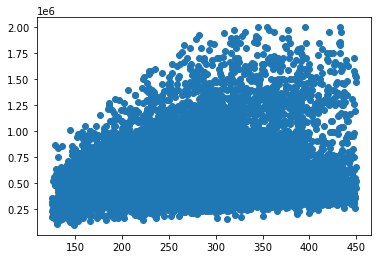

In [99]:
#bed_df = combined_df_all['Bed']
#bed_df.plot.hist( bins = 10)

#combined_df_all.plot

x = combined_df['$/SqFt']
y = combined_df['Sale Price']
plt.scatter(x,y)

array([[<AxesSubplot:title={'center':'$/SqFt'}>]], dtype=object)

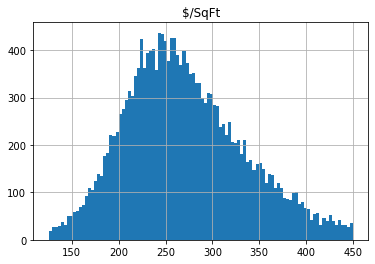

In [100]:
combined_df.hist('$/SqFt', bins = 100)

In [101]:
# Export to csv
combined_df.to_csv('Resources/combined_housing.csv', index=False)